In [8]:
library('Matching')
library('rgenoud')

Loading required package: MASS
## 
##  Matching (Version 4.9-5, Build Date: 2019-03-05)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##

##  rgenoud (Version 5.8-3.0, Build Date: 2019-01-22)
##  See http://sekhon.berkeley.edu/rgenoud for additional documentation.
##  Please cite software as:
##   Walter Mebane, Jr. and Jasjeet S. Sekhon. 2011.
##   ``Genetic Optimization Using Derivatives: The rgenoud package for R.''
##   Journal of Statistical Software, 42(11): 1-26. 
##



# Causal Inference Assignment

## Q1: Debugging

## (a) 

We need to get mout by running Match() after GenMatch(), using genout as the Weight.matrix argument (we also need to check the match balance on mout, not genout). This is because the output of GenMatch() is just the optimal weights on the parameters during matching, whereas the output of Match() is the actual matched observations.

*A secondary problems is that re78 should not be considered at all during matching since it is the outcome variable (is post-treatment)*.

## (b)
The type of matching we do in GenMatch() and Match() have to be the same, so we either have to remove the exact=TRUE parameter from GenMatch() or we should add it to Match(). This is because GenMatch() gets us the optimal weights for a specific type of matching, and the optimal weights for exact matching and non-exact matching will be different.

*A secondary problems is that ideally we shouldn't use/ look at Y at all until after we get a satisfactory match balance to prevent bias, so the Match() function before MatchBalance() should be run without the Y argument.*.

## (c)
I think the problem here is that we are using Y while we are still matching, thus introducing possible bias. Ideally, we would wnat to avoid using Y until we've determined that we are satisfied with our matching so that there is no way for the possible outcomes to affect our assignment mechanism (our matching).



b)


To do genetic matching, you need to run match using the weights outputted by genmatch. 


genmatch
match (no y)
check balance
match (w y)

# Q2: Replication

Replacing the interaction term (wardur * untype4) with (logdead*untype4)

# Copying the Model

In [33]:
modelO <- glm(pbs2s3 ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade + untype4, data = foo, family = binomial)
modelM <- glm(pbs2s3 ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade + untype4 + I(logcost*untype4), data = foo, family = binomial)


In [43]:
modelO$coef

(Intercept)       wartype       logcost        wardur       factnum 
 8.6088619754 -1.7420043394 -0.4448499389  0.0063857322 -1.2589333323 
     factnum2      trnsfcap        treaty       develop           exp 
 0.0616695924  0.0040934456  2.1243681123  0.0007900776 -6.0161788668 
       decade       untype4 
-0.2987758338  3.1351843070

In [45]:
person1 = c(1,median(foo$wartype),
          median(foo$logcost), median(foo$wardur),
          median(foo$factnum), median(foo$factnum2),
          median(foo$trnsfcap), median(foo$treaty),
          median(foo$develop), median(foo$exp),
          median(foo$decade), median(foo$untype4))

person2 = c(1,median(foo$wartype),
          median(foo$logcost), median(foo$wardur),
          median(foo$factnum), median(foo$factnum2),
          median(foo$trnsfcap), median(foo$treaty),
          median(foo$develop), median(foo$exp),
          median(foo$decade), median(foo$untype4),
          median(foo$logcost)* median(foo$untype4))

In [36]:
get_causalEffect <- function(coefs, person) {
  res <- coefs[1] + person[1]*coefs[2] +
    person[2]*coefs[3] +
    person[3]*coefs[4] + 
    person[4]*coefs[5] +
    person[5]*coefs[6] +
    person[6]*coefs[7] +
    person[7]*coefs[8] +
    person[8]*coefs[9] +
    person[9]*coefs[10]+
    person[10]*coefs[11]
  
  return(res)
}

[1] 122  21

In [62]:
# og model res

res1 <- rep(NA, 311) 

# for each war duration
for (dur in c(5:315)) {
    # for a person who has the median value on all other variables
    obs_treat <- c(1,median(foo$wartype),
          median(foo$logcost), dur,
          median(foo$factnum), median(foo$factnum2),
          median(foo$trnsfcap), median(foo$treaty),
          median(foo$develop), median(foo$exp),
          median(foo$decade), 1)
    obs_cause <- c(1,median(foo$wartype),
          median(foo$logcost), dur,
          median(foo$factnum), median(foo$factnum2),
          median(foo$trnsfcap), median(foo$treaty),
          median(foo$develop), median(foo$exp),
          median(foo$decade), 0)
    # store their expected re78
    logit <- modelO$coef%*%obs_treat-modelO$coef%*%obs_cause
    res1[dur-4] <- exp(logit) / (1 + exp(logit))
}

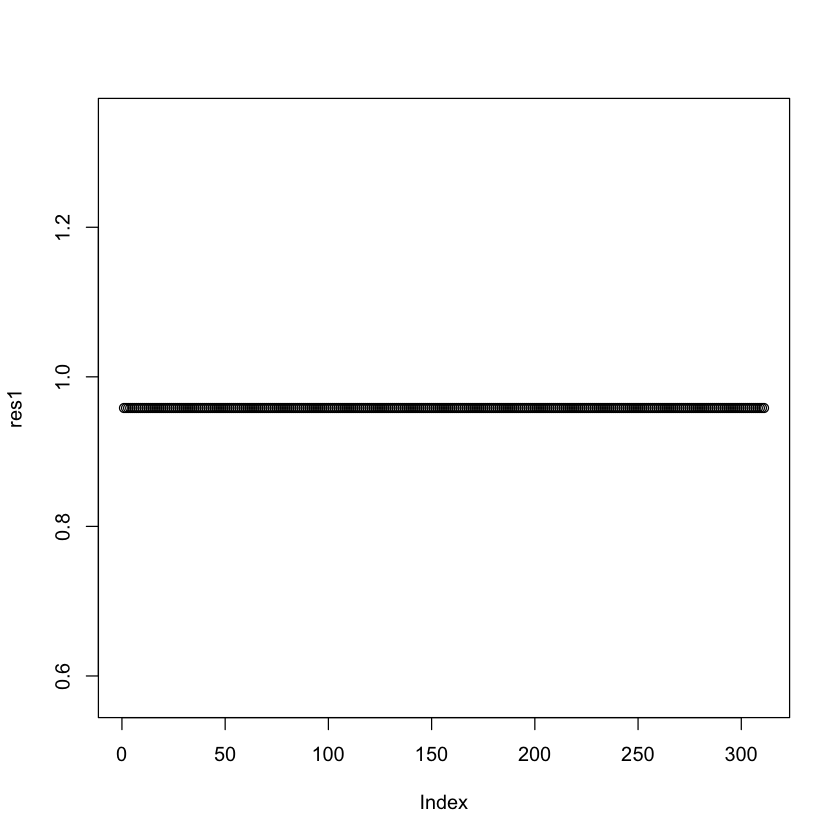

In [63]:
plot(res1)

In [34]:
predict(modelO, newdata = foo)


1           2           3           4           5           6 
-5.45619421 -4.37427036  1.07801920  0.12305113  1.16779445 -3.34924784 
          7           8           9          10          11          12 
-1.50973483 -1.04531916 -1.35557655 -4.47884648 -1.54041304 -0.06456257 
         13          14          15          16          17          18 
-2.02735052 -0.75180049  4.63009460  2.68717639  6.07852009 -0.31727666 
         20          21          22          23          24          25 
 1.19090174  2.46529987 -4.13490519  9.40347396  2.60265402 -2.40054853 
         26          27          28          29          30          31 
-1.44422861 -0.97143331  1.95548944 -0.23415415 -0.17424043 -1.29734170 
         32          33          34          35          36          37 
-3.20838453 -2.70851134 -0.31732641 -2.60400349 -3.24053768 -2.15381787 
         38          39          40          41          42          43 
-0.92043997 -2.72410978  0.09918968 -1.25752186  1.17409728 -1.10585655 
         44          45          46          48          49          50 
-3.70731813  1.46145688  2.74309505 -1.98928448 -3.34394497  0.62158386 
         51          52          53          54          55          56 
-3.63213581 -0.54621713 -3.07345754 -0.96255666 -3.72695206 -0.27181854 
         57          58          59          60          61          62 
-0.57835058  0.95458209 -0.23696286 -3.20989302 -0.78556985  1.77569145 
         63          64          65          66          67          68 
 2.83908490  1.77815442  0.74486856 -1.86755628  2.03973374  1.90224631 
         69          70          71          72          73          74 
-0.83630605  0.04145900 -4.33278792  1.65536018 -3.47473752 -2.94431845 
         75          76          77          78          79          80 
 4.12720666 -0.71764900 -0.98188172 -0.44347843 -2.01968820 -0.11508505 
         81          82          83          84          85          86 
 1.75960051 -1.41288265  0.28693216 -0.30395779 -0.77829248  1.65455893 
         87          88          89          90          91          92 
-1.51493820 -3.05992543 -2.69911596 -3.90698021 -1.47582526 -5.13098022 
         93          94          95          96          97          98 
 4.27551933 -5.76206745  3.19534109 -2.19799347 -0.86449629 -2.86029964 
         99         100         101         102         103         104 
-2.86323275 -2.00554243 -0.66518051 -5.75642845 -2.78248663 -1.72182991 
        105         106         107         108         109         110 
-2.54831996 -5.47273343 -2.84493051 -5.70435974  2.03641291 -1.74778352 
        111         112         113         114         115         116 
-2.45789085  3.00532165 -0.08201051 -5.27534481 -3.11777307 -0.84363517 
        117         118         119         120         121         122 
-2.33044097 -3.31138170  2.35541145 -1.95328425 -1.60730606 -1.60857822 
        123         124 
-0.88804792 -5.27801417

In [4]:
foo <- read.csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00086677-3767/peace.csv")
                
# extract relevant columns
foo <- foo[, c(6:8, 11:16, 99, 50, 114, 49, 63, 136, 109, 126, 48, 160, 142, 10)]

# remove 2 rows with missing data (there are better ways to handle missing data)
foo <- foo[c(-19, -47), ]

# check that all missing data is gone...
which(is.na(foo) == TRUE)


# take a peek at the data set (identify the columns)
head(foo)

integer(0)

clust2,cname,yrbeg,geo,royal,euro,lac,mideast,asia,pbs2s3,⋯,logcost,wardur,factnum,factnum2,trnsfcap,untype4,treaty,develop,exp,decade
AFG,Afghanistan-Taliban,93,3,0,0,0,1,1,0,⋯,14.917451,72,4,16,5.735545,0,0,132.8466,0.1217277,5
AFG,Afghanistan,78,3,0,0,0,1,1,0,⋯,15.671808,168,6,36,9.730863,0,0,132.0000,0.1163292,4
MEX,Mexico,92,2,0,0,1,0,0,1,⋯,6.907755,24,2,4,12.626026,0,0,1533.0000,0.0610000,5
FSU,Russia-Chechnya,94,1,0,1,0,0,0,0,⋯,12.971540,24,2,4,-112.000000,0,1,2216.6079,0.1294513,5
THA,Thailand-Commun.,67,4,0,0,0,0,1,1,⋯,9.210340,216,2,4,4.275317,0,0,1295.0000,0.1420000,3
CHD,Chad,65,5,0,0,0,0,0,0,⋯,12.821259,168,11,121,25.989912,0,1,10.0000,0.0900000,3


In [2]:
summary(foo)

     clust2         cname         yrbeg            geo            royal        
 FSU    : 6   Burma    :  3   Min.   :44.00   Min.   :1.000   Min.   :0.00000  
 IDN    : 5   Burundi  :  3   1st Qu.:65.00   1st Qu.:3.000   1st Qu.:0.00000  
 IND    : 4   Guatemala:  3   Median :75.50   Median :4.000   Median :0.00000  
 IRQ    : 4   Lebanon  :  3   Mean   :74.57   Mean   :3.598   Mean   :0.01639  
 YEM    : 4   Uganda   :  3   3rd Qu.:88.00   3rd Qu.:5.000   3rd Qu.:0.00000  
 ZAI    : 4   Algeria  :  2   Max.   :96.00   Max.   :5.000   Max.   :1.00000  
 (Other):95   (Other)  :105                                                    
      euro              lac            mideast            asia       
 Min.   :0.00000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.00000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.08197   Mean   :0.1393   Mean   :0.1967   Mean   :0.2787  
 3rd Qu.:0

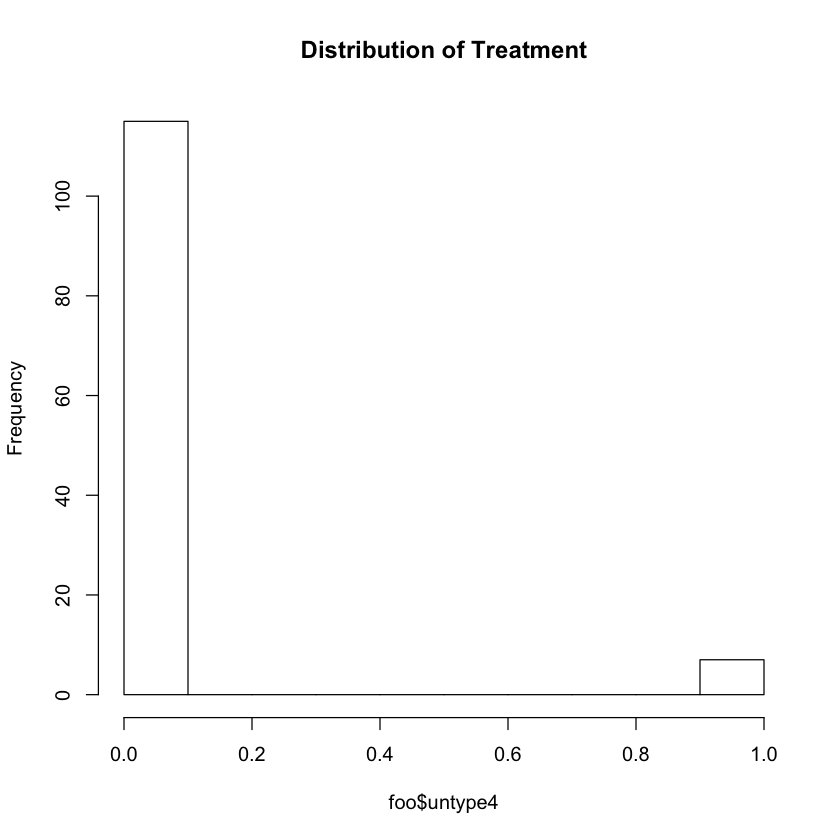

In [3]:
hist(foo$untype4, main = "Distribution of Treatment")

In [47]:
sum(foo$untype4)

[1] 7

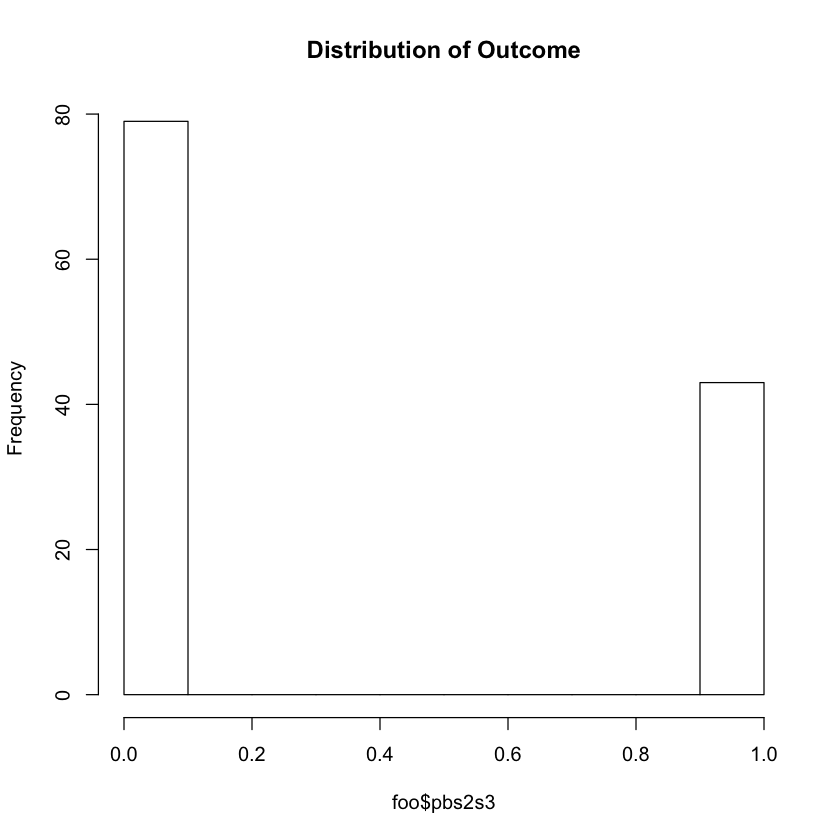

In [48]:
hist(foo$pbs2s3, main = "Distribution of Outcome")

In [49]:
sum(foo$pbs2s3)

[1] 43

**Initial Thoughts**

Treatment is untype4: UN peace enforcement actions
- only 7 treated, 115 control

Outcome is pbs2s3: democracy and peace 2 years later
- 43 peaceful countries, 79 in conflict

SUTVA
- I don't think its safe to assume SUTVA
- conflict/ peace in a region heavily affect conflict/ peace in other regions, particularly close regions
- the same applies for democracy

## Propensity Score Model
https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/DXRXCFAWPK

In [11]:
(glm1$fitted.values)

1            2            3            4            5            6 
7.872419e-11 6.546888e-09 2.220446e-16 1.744239e-06 2.220446e-16 6.504084e-02 
           7            8            9           10           11           12 
1.578221e-06 2.220446e-16 1.058365e-11 2.054893e-11 2.220446e-16 2.220446e-16 
          13           14           15           16           17           18 
5.850788e-11 1.289284e-13 2.404505e-06 6.229645e-03 8.564744e-09 4.919786e-03 
          20           21           22           23           24           25 
2.220446e-16 2.275556e-04 2.429939e-12 3.177495e-05 6.939258e-01 1.302728e-01 
          26           27           28           29           30           31 
5.386115e-11 2.220446e-16 6.563007e-01 1.435378e-05 3.375401e-01 3.031323e-04 
          32           33           34           35           36           37 
2.220446e-16 2.220446e-16 6.857360e-01 2.220446e-16 1.180113e-11 8.991423e-13 
          38           39           40           41           42           43 
2.126006e-12 2.323816e-13 2.220446e-16 1.041100e-11 6.892942e-03 1.898364e-01 
          44           45           46           48           49           50 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 
          51           52           53           54           55           56 
4.353340e-12 1.244303e-01 2.220446e-16 1.234271e-12 3.254341e-13 5.375293e-02 
          57           58           59           60           61           62 
2.220446e-16 2.220446e-16 1.516480e-09 2.324632e-11 3.562212e-01 2.220446e-16 
          63           64           65           66           67           68 
2.220446e-16 2.220446e-16 2.220446e-16 2.220446e-16 9.934323e-01 9.360967e-06 
          69           70           71           72           73           74 
8.774133e-12 2.220446e-16 3.047059e-12 2.220446e-16 6.176538e-13 6.930696e-10 
          75           76           77           78           79           80 
7.186189e-02 2.220446e-16 5.684153e-13 3.423369e-13 9.273165e-12 2.220446e-16 
          81           82           83           84           85           86 
1.462352e-01 2.220446e-16 2.220446e-16 9.012048e-12 1.710568e-12 9.658795e-01 
          87           88           89           90           91           92 
2.220446e-16 2.220446e-16 3.370007e-13 1.267653e-13 2.300669e-02 2.220446e-16 
          93           94           95           96           97           98 
2.332920e-01 2.357416e-11 2.348144e-01 2.473278e-10 8.632945e-02 3.054653e-03 
          99          100          101          102          103          104 
2.476111e-12 2.220446e-16 2.220446e-16 1.883282e-08 4.513295e-11 2.220446e-16 
         105          106          107          108          109          110 
2.220446e-16 5.752048e-11 2.003296e-01 5.469614e-10 2.220446e-16 2.220446e-16 
         111          112          113          114          115          116 
9.093588e-13 7.193319e-01 7.010587e-03 1.286320e-09 7.335001e-12 3.124894e-12 
         117          118          119          120          121          122 
1.617482e-13 3.730629e-03 2.220446e-16 1.381203e-12 8.746344e-11 3.196880e-13 
         123          124 
2.220446e-16 2.220446e-16

In [14]:
length(foo$untype4)

[1] 122

In [15]:
length(glm1$fitted.values)

[1] 122

In [9]:
# propensity score model
glm1 <- glm(untype4 ~ wartype + logcost + wardur + factnum + factnum2 + trnsfcap + treaty + develop + exp + decade, data = foo, family = binomial)

Treat = foo$untype4

mout1 = Match(Tr = Treat, X = glm1$fitted.values)

summary(mout1)

# TAKE NOTE OF: 
# (a) the treatment effect (ATT), and the p-value of the treatment effect;
# (b) which conflicts in the treatment group get matched to which 'control' conflicts
#     (using $mdata OR $index.treated and $index.control)
# (c) the lowest p-value obtained from balance tests, after running MatchBalance on: 
#     wartype, logcost, wardur, factnum, factnum2, trnsfcap, untype4, treaty, 
#     develop, exp, decade...
#     SHORTCUT! COPY/PASTE THE BELOW (after matching, filling in the blank):
mb  <- MatchBalance(untype4 ~  wartype + logcost + wardur + factnum + 
                              factnum2 + trnsfcap +
                              treaty + develop + exp + decade, 
                              data=foo, match.out = mout1, nboots=500)




# STEP 2:
# Perform genetic matching, with X = to all the variables included in MatchBalance
# pop.size should be at least 200, max.generations should be at least 20,
# and wait generations should be at least 10. Estimand is "ATT".

# Take note of the same 3 results as above. Check the rgenoud output
# to see if the genetic algorithm improves fitness over time.




# STEP 3:
# Augment your STEP 2 analysis by including your propensity score in "X"...
# e.g., X <- cbind(X, glm1$fitted)
# Take note of the same 3 results. See if your balance improves with inclusion
# of the propensity score as a matching variable.  See if your impact
# estimate changes. See if you can improve your results (e.g., balance)
# by changing the matching variables, or the matching parameters (e.g., "M")



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  122 
Original number of treated obs...............  7 
Matched number of observations...............  7 
Matched number of observations  (unweighted).  7 


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.42857 	 	    0.42857 
mean control..........    0.65217 	 	    0.85714 
std mean diff.........    -41.832 	 	    -80.178 

mean raw eQQ diff.....    0.14286 	 	    0.42857 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          1 

mean eCDF diff........     0.1118 	 	    0.21429 
med  eCDF diff........     0.1118 	 	    0.21429 
max  eCDF diff........     0.2236 	 	    0.42857 

var ratio (Tr/Co).....     1.2486 	 	          2 
T-test p-value........    0.31772 	 	   0.061835 


***** (V2) logcost *****
                       Before Matching 	 	 After Matching
mean t

In [22]:
mout1$index.treated
mout1$index.control

[1]  23  33  65  73  84  91 110

[1] 27 27 27  6 27 93 27

- They're all matched to the same control
- Before matching minimum p value was almost 0, after matching the minimum p value is 0.008, which still denotes extreme statistically significant differences in the groups. This is likely because even though the observations are closely matched (means of variables very close), there are still extremely small number of observations in each gorup (7) which leads to a low p value.


## Genetic Matching

In [26]:
X = cbind(foo$wartype, foo$logcost, foo$wardur, 
          foo$factnum, foo$factnum2, foo$trnsfcap, 
          foo$treaty, foo$develop, foo$exp, foo$decade)

genout2 = GenMatch(Tr = Treat, X = X)
mout2 = Match(Tr = Treat, X = X, Weight.matrix=genout2)
summary(mout2)
mb2  <- MatchBalance(untype4 ~  wartype + logcost + wardur + factnum + 
                              factnum2 + trnsfcap +
                              treaty + develop + exp + decade, 
                              data=foo, match.out = mout2, nboots=500)


Warning message in GenMatch(Tr = Treat, X = X):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”



Mon Apr  8 15:12:43 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum 


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  122 
Original number of treated obs...............  7 
Matched number of observations...............  7 
Matched number of observations  (unweighted).  7 


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.42857 	 	    0.42857 
mean control..........    0.65217 	 	    0.42857 
std mean diff.........    -41.832 	 	          0 

mean raw eQQ diff.....    0.14286 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          0 

mean eCDF diff........     0.1118 	 	          0 
med  eCDF diff........     0.1118 	 	          0 
max  eCDF diff........     0.2236 	 	          0 

var ratio (Tr/Co).....     1.2486 	 	          1 
T-test p-value........    0.31772 	 	          1 


***** (V2) logcost *****
                       Before Matching 	 	 After Matching
mean t

In [28]:
X3 = cbind(foo$wartype, foo$logcost, foo$wardur, 
          foo$factnum, foo$factnum2, foo$trnsfcap, 
          foo$treaty, foo$develop, foo$exp, foo$decade, glm1$fitted.values)

genout3 = GenMatch(Tr = Treat, X = X3)
mout3 = Match(Tr = Treat, X = X3, Weight.matrix=genout3)
summary(mout3)
mb3  <- MatchBalance(untype4 ~  wartype + logcost + wardur + factnum + 
                              factnum2 + trnsfcap +
                              treaty + develop + exp + decade, 
                              data=foo, match.out = mout3, nboots=500)


Warning message in GenMatch(Tr = Treat, X = X3):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”



Mon Apr  8 16:00:55 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(9) Local-Minimum Crossover........... 	0

SOF


Estimate...  0 
SE.........  0 
T-stat.....  NaN 
p.val......  NA 

Original number of observations..............  122 
Original number of treated obs...............  7 
Matched number of observations...............  7 
Matched number of observations  (unweighted).  7 


***** (V1) wartype *****
                       Before Matching 	 	 After Matching
mean treatment........    0.42857 	 	    0.42857 
mean control..........    0.65217 	 	    0.42857 
std mean diff.........    -41.832 	 	          0 

mean raw eQQ diff.....    0.14286 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          1 	 	          0 

mean eCDF diff........     0.1118 	 	          0 
med  eCDF diff........     0.1118 	 	          0 
max  eCDF diff........     0.2236 	 	          0 

var ratio (Tr/Co).....     1.2486 	 	          1 
T-test p-value........    0.31772 	 	          1 


***** (V2) logcost *****
                       Before Matching 	 	 After Matching
mean t

In [32]:
mout2b = Match(Y= foo$pbs2s3, Tr = Treat, X = X, Weight.matrix=genout2)
summary(mout2b)


Estimate...  0.42857 
AI SE......  0.18704 
T-stat.....  2.2913 
p.val......  0.021947 

Original number of observations..............  122 
Original number of treated obs...............  7 
Matched number of observations...............  7 
Matched number of observations  (unweighted).  7 



Adding propensity score makes the balance worse

# _______DELETE_____

) Replicate figure 8 in https://gking.harvard.edu/files/counterf.pdf -- EXCEPT that this figure considers the implications of
adding an interaction term (wardur * untype4) to the basic model. I want you to consider the implicatiosn of adding a different 
imnteraction term to the basic model -- the interaction term I want you to consider is (logdead*untype4).


In [8]:
library('Matching')

Loading required package: MASS
## 
##  Matching (Version 4.9-5, Build Date: 2019-03-05)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



In [10]:
data(lalonde)
attach(lalonde)

In [11]:
head(lalonde)

age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,treat
37,11,1,0,1,1,0,0,9930.05,1,1,1
22,9,0,1,0,1,0,0,3595.89,1,1,1
30,12,1,0,0,0,0,0,24909.50,1,1,1
27,11,1,0,0,1,0,0,7506.15,1,1,1
33,8,1,0,0,1,0,0,289.79,1,1,1
22,9,1,0,0,1,0,0,4056.49,1,1,1


In [12]:
X = cbind(age,educ,black,hisp,married,nodegr,u74,u75,re75,re74,re74*re75,re78)

genout <- GenMatch(Tr=treat, X=X)

summary(mout)

mb <- MatchBalance(treat~age +educ+black+ hisp+ married+ nodegr+ u74+ u75+
                   re75+ re74+ I(re74*re75) + re78,
                   match.out=genout, nboots=500)

Warning message in GenMatch(Tr = treat, X = X):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”



Sun Mar 31 13:10:05 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 
 0.000000e+00   <=  X2   <=    1.000000e+03 
 0.000000e+00   <=  X3   <=    1.000000e+03 
 0.000000e+00   <=  X4   <=    1.000000e+03 
 0.000000e+00   <=  X5   <=    1.000000e+03 
 0.000000e+00   <=  X6   <=    1.000000e+03 
 0.000000e+00   <=  X7   <=    1.000000e+03 
 0.000000e+00   <=  X8   <=    1.000000e+03 
 0.000000e+00   <=  X9   <=    1.000000e+03 
 0.000000e+00   <=  X10  <=    1.000000e+03 
 0.000000e+00   <=  X11  <=    1.000000e+03 
 0.000000e+00   <=  X12  <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(

ERROR: Error in summary(mout): object 'mout' not found
